In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow.keras.datasets import mnist

from sklearn import svm
import skimage as sk
import numpy as np
import argparse
import imutils
import pandas as panda
import cv2
import os
import random
from sklearn.model_selection import train_test_split

In [4]:
path_to_dataset = r'digits_dataset'
target_img_size = (32, 32)

random_seed = 42  
random.seed(random_seed)
np.random.seed(random_seed)

In [5]:
def cleanImage(image):
    thershold = 100
        
    # image[image > thershold] = 255
    # image[image <= thershold] = 0
    # image = sk.morphology.opening(image)4
    
    # image = sk.color.rgb2gray(image[:,:,:3])


    # image = np.reshape(image,(28,28))
    image = cv2.Canny(image,100,250)

    return image

In [6]:
def extract_hog_features(img):
    img = cv2.resize(img, target_img_size)
    win_size = (16, 16)
    cell_size = (4, 4)
    block_size_in_cells = (2, 2)
    
    block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 9  # Number of orientation bins
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    h = hog.compute(img)
    h = h.flatten()
    return h.flatten()

In [7]:
def extract_features(image):
    image = cleanImage(image)
    return extract_hog_features(image)

In [8]:
def load_dataset():
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    features = []
    labels = []

    for i in range(len(train_images)):
        train_images[i] = np.reshape(train_images[i],(28,28))
        features.append(extract_features(cleanImage(train_images[i])))
        labels.append(train_labels[i])
    
    for i in range(len(test_images)):
        test_images[i] = np.reshape(test_images[i],(28,28))
        features.append(extract_features(cleanImage(test_images[i])))
        labels.append(test_labels[i])
    return features, labels      

In [9]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [10]:
def train_model(features, labels):
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=random_seed)

    print("############## Training ##############")
    classifier.fit(train_features, train_labels)
    
    # Test the model on images it hasn't seen before
    accuracy = classifier.score(test_features, test_labels)
    
    print('accuracy:', accuracy*100, '%')


In [11]:
features, labels = load_dataset()

In [12]:
train_model(features,labels)

############## Training ##############


C:\Users\kareem alaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kareem alaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoun

accuracy: 96.30714285714286 %


In [13]:
def getNumberFromImage(img):
    img = cleanImage(img)
    result = classifier.predict([extract_features(img)])
    return result[0]


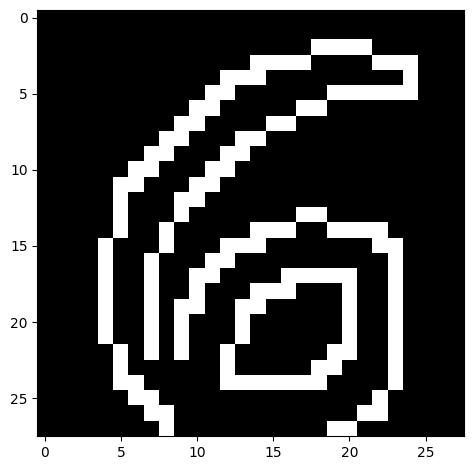

(28, 28)
[6]


In [16]:
test_image = sk.io.imread("./four.png")

test_image = cleanImage(test_image)
sk.io.imshow(test_image)
sk.io.show()

print(test_image.shape)
result = classifier.predict([extract_features(test_image)])
print(result)

